In [1]:
import sys 
sys.path.append('../backtest')

In [2]:
import populator

In [3]:
data_dir = 'data'
exchanges = [('binance', 1000)]
shit_coins = ['ETH/BTC', 'LTC/BTC', 'TRX/BTC', 'ICX/BTC', 'OMG/BTC', 'NEO/BTC']
pairs = ['BTC/USDT'] + shit_coins
tick_size = '1m'
start = '2019-01-01T00:00:00Z'
num_ticks = 31 * 24 * 60

In [4]:
populator.populate(data_dir, exchanges, pairs, tick_size, start, num_ticks)

Batch Size: 1000
Total Entries: 44640
Note: Entries will not exist if they predate exchange history.
Entries Processed: 1000
Entries Processed: 2000
Entries Processed: 3000
Entries Processed: 4000
Entries Processed: 5000
Entries Processed: 6000
Entries Processed: 7000
Entries Processed: 8000
Entries Processed: 9000
Entries Processed: 10000
Entries Processed: 11000
Entries Processed: 12000
Entries Processed: 13000
Entries Processed: 14000
Entries Processed: 15000
Entries Processed: 16000
Entries Processed: 17000
Entries Processed: 18000
Entries Processed: 19000
Entries Processed: 20000
Entries Processed: 21000
Entries Processed: 22000
Entries Processed: 23000
Entries Processed: 24000
Entries Processed: 25000
Entries Processed: 26000
Entries Processed: 27000
Entries Processed: 28000
Entries Processed: 29000
Entries Processed: 30000
Entries Processed: 31000
Entries Processed: 32000
Entries Processed: 33000
Entries Processed: 34000
Entries Processed: 35000
Entries Processed: 36000
Entries 

Entries Processed: 1000
Entries Processed: 2000
Entries Processed: 3000
Entries Processed: 4000
Entries Processed: 5000
Entries Processed: 6000
Entries Processed: 7000
Entries Processed: 8000
Entries Processed: 9000
Entries Processed: 10000
Entries Processed: 11000
Entries Processed: 12000
Entries Processed: 13000
Entries Processed: 14000
Entries Processed: 15000
Entries Processed: 16000
Entries Processed: 17000
Entries Processed: 18000
Entries Processed: 19000
Entries Processed: 20000
Entries Processed: 21000
Entries Processed: 22000
Entries Processed: 23000
Entries Processed: 24000
Entries Processed: 25000
Entries Processed: 26000
Entries Processed: 27000
Entries Processed: 28000
Entries Processed: 29000
Entries Processed: 30000
Entries Processed: 31000
Entries Processed: 32000
Entries Processed: 33000
Entries Processed: 34000
Entries Processed: 35000
Entries Processed: 36000
Entries Processed: 37000
Entries Processed: 38000
Entries Processed: 39000
Entries Processed: 40000
Entries P

In [5]:
import pandas as pd
from functools import reduce

def load_price_frame(pair):
    df = populator.load_data_as_frame(data_dir, 'binance', pair, tick_size, start, num_ticks)
    df = df.rename(columns = {'close': pair})
    return df[[pair]]

def merge_price_frames(pairs):
    dfs = [load_price_frame(pair) for pair in pairs]
    return reduce(lambda left, right: pd.merge(left, right, on='timestamp'), dfs)

In [6]:
prices = merge_price_frames(pairs)

In [7]:
import matplotlib.pyplot as plt

def cross_corr(data_x, data_y, lag=0):
    return data_x.corr(data_y.shift(-lag))

def plot_lag(shit_coin, max_lag_offset):
    data = [abs(cross_corr(prices['BTC/USDT'], prices[shit_coin], lag=i)) for i in range(max_lag_offset)]
    plt.xlabel('Lag Time (minutes)')
    plt.ylabel('Abs. Correlation (to BTC/USDT)')
    plt.plot(data, label=shit_coin)
    plt.legend(loc='lower right')
    plt.show()

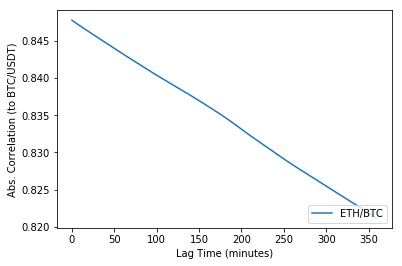

In [8]:
plot_lag('ETH/BTC', 360)

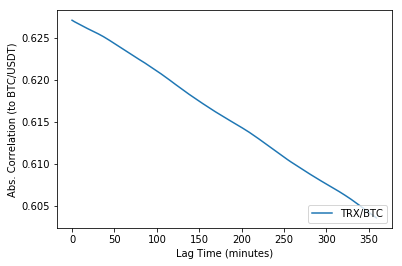

In [10]:
plot_lag('TRX/BTC', 360)

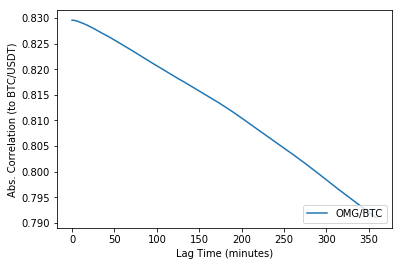

In [11]:
plot_lag('OMG/BTC', 360)